# Seleção de Características por PCA
-----------------------------------------------------------------------------------------------------------------------------

# Bibliotecas Utilizadas 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualize
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pd.set_option('display.max_columns', None)

# Carga do dataset normalizado

In [2]:
dataset_normal = pd.read_csv('dataset-normalizado.csv', header = 0)
print("Length result dataset: {} rows".format(len(dataset_normal)))
dataset_normal.head()

Length result dataset: 649 rows


,school,sex,age,address,famsize,Pstatus,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Medu_0,Medu_1,Medu_2,Medu_3,Medu_4,Fedu_0,Fedu_1,Fedu_2,Fedu_3,Fedu_4,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,is_approved
0,0.0,0.0,0.428571,0.0,0.0,0.0,0.333333,0.333333,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.75,0.50,0.75,0.00,0.00,0.5,0.1250,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.285714,0.0,0.0,1.0,0.000000,0.333333,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.00,0.50,0.50,0.00,0.00,0.5,0.0625,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,1.0,1.0,0.000000,0.333333,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.75,0.50,0.25,0.25,0.50,0.5,0.1875,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,1.0,0.000000,0.666667,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.50,0.25,0.25,0.00,0.00,1.0,0.0000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.142857,0.0,0.0,1.0,0.000000,0.333333,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.75,0.50,0.25,0.00,0.25,1.0,0.0000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


# Separa o dataset em features e target

In [3]:
# Separa o dataset_normal em dataset_features e dataset_target

features = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'traveltime', 'studytime', 'failures', 'schoolsup', 
            'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 
            'Dalc', 'Walc', 'health', 'absences', 'Medu_0', 'Medu_1', 'Medu_2', 'Medu_3', 'Medu_4', 'Fedu_0', 'Fedu_1', 
            'Fedu_2', 'Fedu_3', 'Fedu_4', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 
            'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 
            'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other']

# Separating out the features
dataset_features = pd.DataFrame(dataset_normal.loc[:, features].values, columns=[features])

# Separating out the target
dataset_target = pd.DataFrame(dataset_normal.loc[:, ['is_approved']].values, columns=['is_approved'])

In [4]:
# Dataset apenas com as características

print("Number of features: {}" .format(len(dataset_features.columns)))
print("Number of target: {}" .format(len(dataset_target.columns)))

Number of features: 51
Number of target: 1


#  Função para aplicar o PCA e gera o gráfico com taxa de explicação

In [5]:
def aplica_pca(taxa, dataset_features):
    
    if taxa == 1.0:
        pca = PCA()
        dataset_reduced = pca.fit_transform(dataset_features)
    else:      
        pca = PCA(n_components = taxa)
        dataset_reduced = pca.fit_transform(dataset_features)

    principal_components = pd.DataFrame(data=dataset_reduced)
    principal_components.add_prefix('PC_').head()

    # Considerando todas as componentes principais
    variance_explaneid = pca.explained_variance_ratio_

    print("Taxa de Variância Explicada: {}" .format(taxa))
    print("Número de Componentes Principais: {}" .format(len(principal_components.columns)))


    # Gráfico de variação explicada com uma função do número de dimensões
    cumsum = np.cumsum(pca.explained_variance_ratio_)

    plt.plot(cumsum)
    plt.title('Variância Explicada x Dimensões')
    plt.ylabel('Variância Explicada')
    plt.xlabel('Dimensões')
    plt.show()
    
    return principal_components

###  1 - Taxa de Variância Explicada: 100%

Taxa de Variância Explicada: 1
Número de Componentes Principais: 51


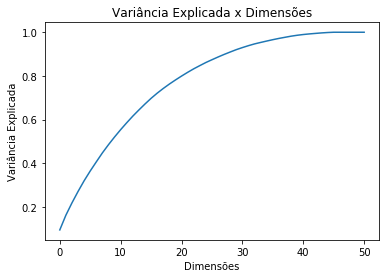

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28,PC_29,PC_30,PC_31,PC_32,PC_33,PC_34,PC_35,PC_36,PC_37,PC_38,PC_39,PC_40,PC_41,PC_42,PC_43,PC_44,PC_45,PC_46,PC_47,PC_48,PC_49,PC_50
0,-0.220652,-0.719667,-0.909514,-0.021862,-0.585860,-0.204762,-0.583601,0.751289,-0.383584,0.237123,0.479783,0.146673,-0.282909,0.577534,-0.373166,0.641129,1.328580,0.036713,0.419828,0.445071,-0.174104,-0.092755,0.508410,0.418462,0.404067,-0.360004,-0.167031,0.206737,-0.596693,-0.042527,0.111422,0.131904,0.194384,-0.411581,-0.423531,0.244955,0.424079,0.159520,0.231765,0.071278,0.051023,-0.094154,0.118581,-0.187632,-0.047055,0.004937,7.050755e-15,-5.444213e-16,1.399590e-16,9.554536e-17,-1.481717e-16
1,0.924440,-0.383439,0.287934,-0.872647,-0.449971,-0.034360,-0.990872,-0.280202,0.188081,0.999588,-0.253408,-0.515893,-0.518702,0.389535,-0.143304,0.604716,-0.538052,0.120750,0.420949,0.019103,0.277847,0.120124,-0.268823,0.007048,-0.106856,-0.237770,-0.117470,-0.061774,-0.083145,-0.278945,-0.302812,0.114174,0.279505,0.014506,-0.081223,-0.314140,0.106154,-0.007871,0.000591,0.012911,0.072319,0.047782,0.100052,-0.103032,-0.043470,-0.023685,7.493097e-16,1.693071e-16,5.783476e-16,-3.204406e-16,-1.341198e-16
2,0.471693,0.162750,-0.568159,-0.556519,-0.012194,0.997585,0.054099,0.377720,-0.019011,1.316012,0.589103,0.139331,-0.244223,0.387145,-0.138796,0.096983,-0.341196,-0.174739,-0.118707,0.095389,-0.091593,-0.592491,-0.523312,1.109196,0.049493,-0.002266,0.314114,-0.095181,-0.130146,0.162098,0.398739,-0.233939,0.027829,0.194443,-0.099827,-0.063794,-0.079950,0.140177,0.070926,-0.026307,0.000820,-0.011520,-0.248276,0.040904,0.026452,-0.006524,-1.015955e-15,5.467017e-16,-4.018664e-16,4.027365e-16,-4.062782e-16
3,-1.156396,-0.100441,-0.016081,0.410147,-0.682811,0.487596,0.453072,0.285571,-0.667889,-0.261983,-0.636646,0.040073,-0.539099,-0.778976,-0.048528,0.173557,-0.252568,-0.161614,-0.523924,0.227577,0.466000,-0.081539,-0.346139,-0.467795,-0.646094,-0.108674,-0.013246,0.702012,0.064973,0.198906,0.141296,0.002905,-0.351436,-0.086378,-0.256215,0.204756,0.077486,0.133360,-0.080883,-0.096545,0.041968,0.090550,-0.050482,0.138783,0.011602,-0.018108,-8.028065e-16,-6.008475e-16,-1.673363e-16,-2.089301e-16,-2.232462e-16
4,-0.268156,0.942162,1.174272,-0.859756,-0.180044,0.233504,-1.181295,0.055018,-0.056678,-0.094750,0.388082,-0.034748,-0.358420,-0.359741,0.243461,-0.424738,0.672599,0.089763,-0.346580,-0.210922,0.012714,-0.376388,0.129872,-0.363968,-0.332365,0.268199,-0.036684,-0.164052,0.203000,-0.200009,-0.075283,-0.122490,0.022800,0.162364,-0.058490,-0.022436,-0.019689,0.124529,-0.002918,-0.049719,-0.088995,0.015872,0.067500,0.053328,-0.036980,-0.059301,-1.381953e-15,-5.928986e-16,-2.041164e-16,-6.265192e-17,-2.653923e-16


In [6]:
taxa = 1
principal_components_1 = aplica_pca(taxa, dataset_features)
principal_components_1.add_prefix('PC_').head()

###  2 - Taxa de Variância Explicada: 95%

Taxa de Variância Explicada: 0.95
Número de Componentes Principais: 34


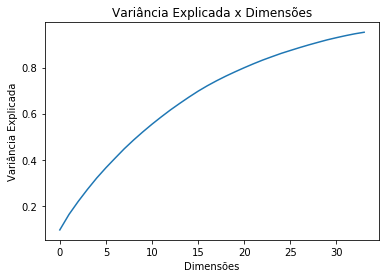

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28,PC_29,PC_30,PC_31,PC_32,PC_33
0,-0.220652,-0.719667,-0.909514,-0.021862,-0.585860,-0.204762,-0.583601,0.751289,-0.383584,0.237123,0.479783,0.146673,-0.282909,0.577534,-0.373166,0.641129,1.328580,0.036713,0.419828,0.445071,-0.174104,-0.092755,0.508410,0.418462,0.404067,-0.360004,-0.167031,0.206737,-0.596693,-0.042527,0.111422,0.131904,0.194384,-0.411581
1,0.924440,-0.383439,0.287934,-0.872647,-0.449971,-0.034360,-0.990872,-0.280202,0.188081,0.999588,-0.253408,-0.515893,-0.518702,0.389535,-0.143304,0.604716,-0.538052,0.120750,0.420949,0.019103,0.277847,0.120124,-0.268823,0.007048,-0.106856,-0.237770,-0.117470,-0.061774,-0.083145,-0.278945,-0.302812,0.114174,0.279505,0.014506
2,0.471693,0.162750,-0.568159,-0.556519,-0.012194,0.997585,0.054099,0.377720,-0.019011,1.316012,0.589103,0.139331,-0.244223,0.387145,-0.138796,0.096983,-0.341196,-0.174739,-0.118707,0.095389,-0.091593,-0.592491,-0.523312,1.109196,0.049493,-0.002266,0.314114,-0.095181,-0.130146,0.162098,0.398739,-0.233939,0.027829,0.194443
3,-1.156396,-0.100441,-0.016081,0.410147,-0.682811,0.487596,0.453072,0.285571,-0.667889,-0.261983,-0.636646,0.040073,-0.539099,-0.778976,-0.048528,0.173557,-0.252568,-0.161614,-0.523924,0.227577,0.466000,-0.081539,-0.346139,-0.467795,-0.646094,-0.108674,-0.013246,0.702012,0.064973,0.198906,0.141296,0.002905,-0.351436,-0.086378
4,-0.268156,0.942162,1.174272,-0.859756,-0.180044,0.233504,-1.181295,0.055018,-0.056678,-0.094750,0.388082,-0.034748,-0.358420,-0.359741,0.243461,-0.424738,0.672599,0.089763,-0.346580,-0.210922,0.012714,-0.376388,0.129872,-0.363968,-0.332365,0.268199,-0.036684,-0.164052,0.203000,-0.200009,-0.075283,-0.122490,0.022800,0.162364


In [7]:
taxa = 0.95
principal_components_2 = aplica_pca(taxa, dataset_features)
principal_components_2.add_prefix('PC_').head()

###  3 - Taxa de Variância Explicada: 90%

Taxa de Variância Explicada: 0.9
Número de Componentes Principais: 29


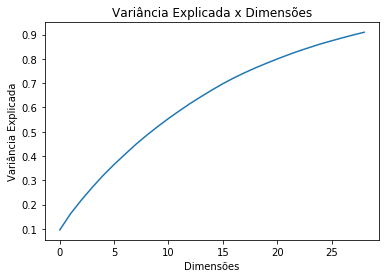

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28
0,-0.220652,-0.719667,-0.909514,-0.021862,-0.585860,-0.204762,-0.583601,0.751289,-0.383584,0.237123,0.479783,0.146673,-0.282909,0.577534,-0.373166,0.641129,1.328580,0.036713,0.419828,0.445071,-0.174104,-0.092755,0.508410,0.418462,0.404067,-0.360004,-0.167031,0.206737,-0.596693
1,0.924440,-0.383439,0.287934,-0.872647,-0.449971,-0.034360,-0.990872,-0.280202,0.188081,0.999588,-0.253408,-0.515893,-0.518702,0.389535,-0.143304,0.604716,-0.538052,0.120750,0.420949,0.019103,0.277847,0.120124,-0.268823,0.007048,-0.106856,-0.237770,-0.117470,-0.061774,-0.083145
2,0.471693,0.162750,-0.568159,-0.556519,-0.012194,0.997585,0.054099,0.377720,-0.019011,1.316012,0.589103,0.139331,-0.244223,0.387145,-0.138796,0.096983,-0.341196,-0.174739,-0.118707,0.095389,-0.091593,-0.592491,-0.523312,1.109196,0.049493,-0.002266,0.314114,-0.095181,-0.130146
3,-1.156396,-0.100441,-0.016081,0.410147,-0.682811,0.487596,0.453072,0.285571,-0.667889,-0.261983,-0.636646,0.040073,-0.539099,-0.778976,-0.048528,0.173557,-0.252568,-0.161614,-0.523924,0.227577,0.466000,-0.081539,-0.346139,-0.467795,-0.646094,-0.108674,-0.013246,0.702012,0.064973
4,-0.268156,0.942162,1.174272,-0.859756,-0.180044,0.233504,-1.181295,0.055018,-0.056678,-0.094750,0.388082,-0.034748,-0.358420,-0.359741,0.243461,-0.424738,0.672599,0.089763,-0.346580,-0.210922,0.012714,-0.376388,0.129872,-0.363968,-0.332365,0.268199,-0.036684,-0.164052,0.203000


In [8]:
taxa = 0.90
principal_components_3 = aplica_pca(taxa, dataset_features)
principal_components_3.add_prefix('PC_').head()

### 4 - Taxa de Variância Explicada: 85%

Taxa de Variância Explicada: 0.85
Número de Componentes Principais: 25


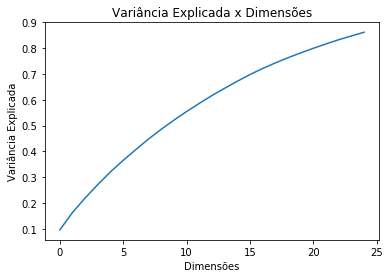

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20,PC_21,PC_22,PC_23,PC_24
0,-0.220652,-0.719667,-0.909514,-0.021862,-0.585860,-0.204762,-0.583601,0.751289,-0.383584,0.237123,0.479783,0.146673,-0.282909,0.577534,-0.373166,0.641129,1.328580,0.036713,0.419828,0.445071,-0.174104,-0.092755,0.508410,0.418462,0.404067
1,0.924440,-0.383439,0.287934,-0.872647,-0.449971,-0.034360,-0.990872,-0.280202,0.188081,0.999588,-0.253408,-0.515893,-0.518702,0.389535,-0.143304,0.604716,-0.538052,0.120750,0.420949,0.019103,0.277847,0.120124,-0.268823,0.007048,-0.106856
2,0.471693,0.162750,-0.568159,-0.556519,-0.012194,0.997585,0.054099,0.377720,-0.019011,1.316012,0.589103,0.139331,-0.244223,0.387145,-0.138796,0.096983,-0.341196,-0.174739,-0.118707,0.095389,-0.091593,-0.592491,-0.523312,1.109196,0.049493
3,-1.156396,-0.100441,-0.016081,0.410147,-0.682811,0.487596,0.453072,0.285571,-0.667889,-0.261983,-0.636646,0.040073,-0.539099,-0.778976,-0.048528,0.173557,-0.252568,-0.161614,-0.523924,0.227577,0.466000,-0.081539,-0.346139,-0.467795,-0.646094
4,-0.268156,0.942162,1.174272,-0.859756,-0.180044,0.233504,-1.181295,0.055018,-0.056678,-0.094750,0.388082,-0.034748,-0.358420,-0.359741,0.243461,-0.424738,0.672599,0.089763,-0.346580,-0.210922,0.012714,-0.376388,0.129872,-0.363968,-0.332365


In [9]:
taxa = 0.85
principal_components_4 = aplica_pca(taxa, dataset_features)
principal_components_4.add_prefix('PC_').head()

### 5 - Taxa de Variância Explicada: 80%

Taxa de Variância Explicada: 0.8
Número de Componentes Principais: 22


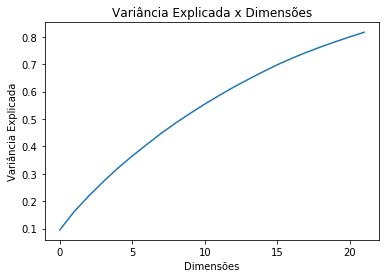

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20,PC_21
0,-0.220652,-0.719667,-0.909514,-0.021862,-0.585860,-0.204762,-0.583601,0.751289,-0.383584,0.237123,0.479783,0.146673,-0.282909,0.577534,-0.373166,0.641129,1.328580,0.036713,0.419828,0.445071,-0.174104,-0.092755
1,0.924440,-0.383439,0.287934,-0.872647,-0.449971,-0.034360,-0.990872,-0.280202,0.188081,0.999588,-0.253408,-0.515893,-0.518702,0.389535,-0.143304,0.604716,-0.538052,0.120750,0.420949,0.019103,0.277847,0.120124
2,0.471693,0.162750,-0.568159,-0.556519,-0.012194,0.997585,0.054099,0.377720,-0.019011,1.316012,0.589103,0.139331,-0.244223,0.387145,-0.138796,0.096983,-0.341196,-0.174739,-0.118707,0.095389,-0.091593,-0.592491
3,-1.156396,-0.100441,-0.016081,0.410147,-0.682811,0.487596,0.453072,0.285571,-0.667889,-0.261983,-0.636646,0.040073,-0.539099,-0.778976,-0.048528,0.173557,-0.252568,-0.161614,-0.523924,0.227577,0.466000,-0.081539
4,-0.268156,0.942162,1.174272,-0.859756,-0.180044,0.233504,-1.181295,0.055018,-0.056678,-0.094750,0.388082,-0.034748,-0.358420,-0.359741,0.243461,-0.424738,0.672599,0.089763,-0.346580,-0.210922,0.012714,-0.376388


In [10]:
taxa = 0.80
principal_components_5 = aplica_pca(taxa, dataset_features)
principal_components_5.add_prefix('PC_').head()

### 6 - Taxa de Variância Explicada: 75%

Taxa de Variância Explicada: 0.75
Número de Componentes Principais: 19


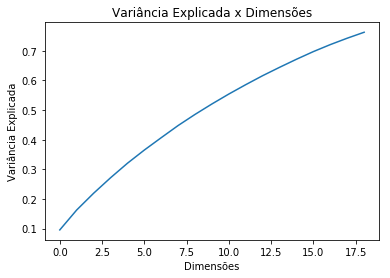

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18
0,-0.220652,-0.719667,-0.909514,-0.021862,-0.585860,-0.204762,-0.583601,0.751289,-0.383584,0.237123,0.479783,0.146673,-0.282909,0.577534,-0.373166,0.641129,1.328580,0.036713,0.419828
1,0.924440,-0.383439,0.287934,-0.872647,-0.449971,-0.034360,-0.990872,-0.280202,0.188081,0.999588,-0.253408,-0.515893,-0.518702,0.389535,-0.143304,0.604716,-0.538052,0.120750,0.420949
2,0.471693,0.162750,-0.568159,-0.556519,-0.012194,0.997585,0.054099,0.377720,-0.019011,1.316012,0.589103,0.139331,-0.244223,0.387145,-0.138796,0.096983,-0.341196,-0.174739,-0.118707
3,-1.156396,-0.100441,-0.016081,0.410147,-0.682811,0.487596,0.453072,0.285571,-0.667889,-0.261983,-0.636646,0.040073,-0.539099,-0.778976,-0.048528,0.173557,-0.252568,-0.161614,-0.523924
4,-0.268156,0.942162,1.174272,-0.859756,-0.180044,0.233504,-1.181295,0.055018,-0.056678,-0.094750,0.388082,-0.034748,-0.358420,-0.359741,0.243461,-0.424738,0.672599,0.089763,-0.346580


In [11]:
taxa = 0.75
principal_components_6 = aplica_pca(taxa, dataset_features)
principal_components_6.add_prefix('PC_').head()

### 7 - Taxa de Variância Explicada: 70%

Taxa de Variância Explicada: 0.7
Número de Componentes Principais: 17


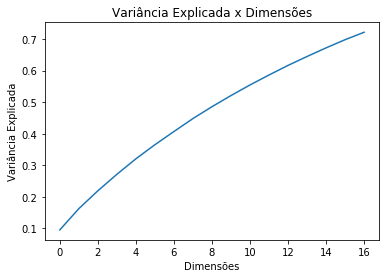

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16
0,-0.220652,-0.719667,-0.909514,-0.021862,-0.585860,-0.204762,-0.583601,0.751289,-0.383584,0.237123,0.479783,0.146673,-0.282909,0.577534,-0.373166,0.641129,1.328580
1,0.924440,-0.383439,0.287934,-0.872647,-0.449971,-0.034360,-0.990872,-0.280202,0.188081,0.999588,-0.253408,-0.515893,-0.518702,0.389535,-0.143304,0.604716,-0.538052
2,0.471693,0.162750,-0.568159,-0.556519,-0.012194,0.997585,0.054099,0.377720,-0.019011,1.316012,0.589103,0.139331,-0.244223,0.387145,-0.138796,0.096983,-0.341196
3,-1.156396,-0.100441,-0.016081,0.410147,-0.682811,0.487596,0.453072,0.285571,-0.667889,-0.261983,-0.636646,0.040073,-0.539099,-0.778976,-0.048528,0.173557,-0.252568
4,-0.268156,0.942162,1.174272,-0.859756,-0.180044,0.233504,-1.181295,0.055018,-0.056678,-0.094750,0.388082,-0.034748,-0.358420,-0.359741,0.243461,-0.424738,0.672599


In [12]:
taxa = 0.70
principal_components_6 = aplica_pca(taxa, dataset_features)
principal_components_6.add_prefix('PC_').head()

# Exporta o dataset com os componentes principais selecionados

In [13]:
# Indicar o resultado que queremos exportar
dataset_pca = principal_components_6

# Adiciona o Prefixo no nome da coluna
dataset_pca = dataset_pca.add_prefix('PC_')

# Adiciona a coluna Target
dataset_pca['is_approved'] = dataset_target

dataset_pca.to_csv("dataset-pca.csv", index=False)
print("Rows: {}".format(len(dataset_pca)))
print("Columns: {}" .format(len(dataset_pca.columns)))
dataset_pca.head()

Rows: 649
Columns: 18


,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,is_approved
0,-0.220652,-0.719667,-0.909514,-0.021862,-0.585860,-0.204762,-0.583601,0.751289,-0.383584,0.237123,0.479783,0.146673,-0.282909,0.577534,-0.373166,0.641129,1.328580,0.0
1,0.924440,-0.383439,0.287934,-0.872647,-0.449971,-0.034360,-0.990872,-0.280202,0.188081,0.999588,-0.253408,-0.515893,-0.518702,0.389535,-0.143304,0.604716,-0.538052,0.0
2,0.471693,0.162750,-0.568159,-0.556519,-0.012194,0.997585,0.054099,0.377720,-0.019011,1.316012,0.589103,0.139331,-0.244223,0.387145,-0.138796,0.096983,-0.341196,0.0
3,-1.156396,-0.100441,-0.016081,0.410147,-0.682811,0.487596,0.453072,0.285571,-0.667889,-0.261983,-0.636646,0.040073,-0.539099,-0.778976,-0.048528,0.173557,-0.252568,0.0
4,-0.268156,0.942162,1.174272,-0.859756,-0.180044,0.233504,-1.181295,0.055018,-0.056678,-0.094750,0.388082,-0.034748,-0.358420,-0.359741,0.243461,-0.424738,0.672599,0.0
